[School of Tomorrow (Home)](School_of_Tomorrow.ipynb)

<div style="text-align: center;">
<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/54504421824/in/dateposted/" title="Not Your Grandma&#x27;s MineCraft"><img src="https://live.staticflickr.com/65535/54504421824_f6ab851bf0_o.png" width="931" height="589" alt="Not Your Grandma&#x27;s MineCraft"/></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>
</div>

<div style="text-align: center;">
Last Slide: Now What?
</div>

# Project QuadCraft: DEMO versions
### *"a world beyond MineCraft"*

<div style="text-align: center;">
<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/4073009388/" title="Quadray Coordinates"><img src="https://live.staticflickr.com/2693/4073009388_e924a4091c_o.gif" width="400" height="350" alt="Quadray Coordinates"/></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>
</div>

In [1]:
import qrays
import sympy
from qrays import Vector, Qvector
from sympy import sqrt

from itertools import permutations
from random import choice

### Background

The Quadcraft Project was originally developed by [the Crescent City campus](https://www.hmdb.org/m.asp?m=181238 ) to encourage programmers to contribute to the pool of demo projects suitable for appending to [the Quadrays slide deck](https://docs.google.com/presentation/d/1ynde13tnMAu7EelfVuQVTFDUWGYBcRDRmtkMu4LIUFw/edit?usp=sharing) (4D Solutions). 

[School of Tomorrow](https://github.com/4dsolutions/School_of_Tomorrow/blob/master/School_of_Tomorrow.ipynb) students will be able to eyeball the source code related to numerous implementations of the concepts, thereby reinforcing their mastery of the material while introducing them to alternative tool sets.

Presenters of the Quardrays slides, when they get to the last slide, which says DEMO, will be able to shift gears into one or more demos, choosing from our growing inventory of open source implementations.

The details of the UI are left to the programmer, but with up front guidance as to what a default implementation might include, in terms of dashboard display widgets and a main 3d canvas. A goal is to dovetail with the slide presentation, creating a mutually reinforcing feedback loop.

For example, the UI sketched below consists of four UAPs (UFOs) which think in terms of [Martian Math](https://github.com/4dsolutions/DigitalMathematics/blob/master/MartianMath.ipynb) (i.e. IVM coordinates) when moving from CCP ball to neighboring CCP ball. 

The program keeps track of their six respective inter-distances and continually re-computes the tetravolume for the tetrahedron resulting from the four-UFO formation. 

The UFOs occupy CCP balls.  Four such inter-tangent balls define the unit volume tetrahedron.

### Basic UI Concepts

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/54504074003/in/dateposted/" title="QuadCraft Dashboard Concepts"><img src="https://live.staticflickr.com/65535/54504074003_31a72d23dd_z.jpg" width="640" height="501" alt="QuadCraft Dashboard Concepts"/></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

We will keep track of the positions of the UFOs in both Quadray Coordinates (IVM coordinates) and in XYZ coordinates. 

Quadrays employ 4-tuples and in canonical lowest-terms form at least one of the 4 slots is zero, representing the quadray not bounding the quadrant in question (the quadrant a point is actually in).

Only three of the four quadrays bounds each of the four quadrants of space, so it makes sense there's always at least one unused basis vector.  

Defining a "lowest terms" also addresses the issue that every quadray forms an equivalence class, much as rational numbers do e.g. 1/2 = 2/4 = 3/6 ...  Likewise (a,b,c,d) + any (n,n,n,n) defines the same point. 

So to simplify to lowest terms: subtract the smallest (n,n,n,n) that makes at least one of the four digits a zero (i.e. unused), keeping the rest positive.

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/54504412999/in/dateposted/" title="Initializing a Quadray"><img src="https://live.staticflickr.com/65535/54504412999_c20862dbf6_w.jpg" width="400" height="210" alt="Initializing a Quadray"/></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

We have a reference version of "Qvectors" (Quadrays) [available in Python](https://github.com/4dsolutions/School_of_Tomorrow/blob/master/qrays.py).

The canvas below, alluded to above in the "IVM" area, shows the 3d contrails of four avatars random walking in the CCP. 

Every move is to a neighboring ball in the CCP lattice (cubic closest packing). 

At every turn to play, the four UFOs define six interdistances that in turn define a tetrahedron, the volume of which we will compute, and display.

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/54502948587/in/dateposted/" title="Four UFOs Leaving RD Contrails"><img src="https://live.staticflickr.com/65535/54502948587_0cd17f91ee_z.jpg" width="607" height="503" alt="Four UFOs Leaving RD Contrails"/></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

### Twelve Degrees of Freedom in the CCP
This display instrument below shows how 12 linear combinations of quadrays {2, 1, 1, 0} correspond to the corners of a cuboctahedron, meaning a neighboring tangent sphere relative to the central sphere. 

Given Basis Quadrays:

* A ← (1, 0, 0, 0) 
* B ← (0, 1, 0, 0) 
* C ←(0, 0, 1, 0) 
* D ← (0, 0, 0, 1)

multiply any one of them by 2, any two others by 1 (i.e. take as is), and don’t use the fourth one at all (multiply by 0), and add the results. Quadray vectors add the same way XYZ vectors do, tip-to-tail.

The resultant vector will be from ORIGIN (0,0,0,0) to one of the 12 corners of the cuboctahedron, of radial and circumferential edges DIAMETER (the same length as the edges of the home base tetrahedron).

![thrusters.gif](thrusters.gif)

Source code for this GIF:  [test2 in quadcraft.py](https://github.com/4dsolutions/School_of_Tomorrow/blob/master/quadcraft.py#L64) (uses [Flextegrity Framework](https://github.com/4dsolutions/School_of_Tomorrow/blob/master/Flextegrity_Lattice.ipynb))

The animated GIF below shows how 12 unit diameter spheres define the 24 edges of the yellow cuboctahedron, as well as how rhombic dodecahedra encase each such ball in a space-filling lattace.

![synergetica](https://grunch.net/synergetics/hierarchy/sphpackanim.gif)

For more context see:  [The Synergetics Hierarchy of Concentric Polyhedra](https://grunch.net/synergetics/volumes.html) @ [Synergetics on the Web](https://grunch.net/synergetics/) at grunch.net 

### Turtle

Sea Turtle, Drone, UAP, UAV... UFO... take your pick.  The idea comes from Logo language, of which 3D versions were developed.

Do Turtle movements leave a trace?  Perhaps only when "pen down".  How do we control their movements?  

Might they each have a "random" mode?

### Movement 

The idea is one could mouse click on one of 12 buttons, or use the keyboard, if wanting to move a Turtle to a neigboring ball center.

This world is all about a lattice of ball centers, and not just any lattice, but the CCP in particular

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/54504191001/in/dateposted/" title="4D Studios:  Claymation Station"><img src="https://live.staticflickr.com/65535/54504191001_cf40eb5002_n.jpg" width="320" height="319" alt="4D Studios:  Claymation Station"/></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

What happens when we reach an edge? The IVM ocean is not of infinite size. What does the outer perimeter look like? A cube? A cuboctahedron? A sphere?

This is a UI challenge left in the hands of DEMO developers. In the default implementation, some of the "next" buttons will gray out when a boundary is reached. Not all twelve surrounding position will be available.

The computer will have known ahead of time these spatial positions were beyond the outer limits. Would that be because of an exceeded radius (distance from the center), or because of some other criteria? A simple rule might take the form: "no single coordinate shall be above the number N".

Note that in principle quadrays are free to vary smoothly, as floating points. Whether a given DEMO permits that is again up to the developer. To sync with the slides, the recommendation is to go with a CCP ball diameter of unity or unity-2, with a corresponding radius of 1/2 or 1:  D=1, R=1/2; D=2, R=1. The Python implementation allows toggling between these two regimes, but without changing the answers in terms of tetravolumes i.e. the home base quadray tetrahedron has volume one, whether the edges are valued at one or two. The home base quadray tetrahedron is defined by four such CCP balls in intertangency, their four centers and six center-interconnecting edges 

The integral "click stops" at ball centers is not meant to foreclose all other possibilities. Continous and/or very high frequency resolution implies Quadrays used to describe curvacious paths, not just discrete point lattices. How fine / precise the movements might be has to do with the granularity of the ball packing.

### Location

"Where am I now?"  The selected UAP displays its current location, according to two different coordinate systems:  IVM and XYZ. 

In this namespace, "IVM coordinates" are an alias for the Quadray Coordinates, which in turn maybe others call by other names. The use of three capital letters for each of XYZ and IVM is partly what makes "IVM" attractive: the easy mnemonic relationship twixt those language games we wish to contrast. Spelled out, "IVM" stands for "isotropic vector matrix" and was deployed by Buckminster Fuller in the namespace of Synergetics, where he made a lot of design decisions around language, *Synergetics* being his sandbox or playpen or magnum opus.

Note that none of these words ("isotropic" "vector" or "matrix") are neologisms. They're all good dictionary words that long predate Bucky. His attitude, expressed in The Remoteness of the Synergetics Vocabulary (250.31), was he had as much right to raid (i.e. borrow from) the dictionary as anyone, and in so doing he thereby "revectored" a lot of words, bending them along new trajectories, including science words. The sciences do this too: apply "spin" to "psy-ons" per [Cultagory Theory](https://docs.google.com/presentation/d/1zvEA5wf5ToyCK27IHGDQ-E47a0Try7DZE0_79dB0lA8/edit?usp=sharing).

In the namespace of Harold Bloom in *A Map of Misreading*, Fuller was a master of misprision.

<blockquote>
In *A Map of Misreading* Bloom continued his habit of creating his own linguistic terms to explain his concept of passing on the poetic tradition. His tropes became “anxiety” and “misreading” and, in his second book of the series, many of his terms came from the Kabbala.  He explained “misprision”–a deliberate misunderstanding–as a “swerve” away from the predecessor by the new poet who completes the parent poem by retaining its terms and its fragments but means these terms in another sense.  
   
[source](https://arthistoryunstuffed.com/harold-bloom-a-map-of-misreading/)

</blockquote>

The Quadray apparatus is calibrated to be CCP-friendly at the expense of XYZ one could say, in that the CCP ball centers have non-negative integer coordinates in the Qvectors, whereas the corresponding addresses in the XYZ system involve "radicals" or "surds" meaning irrational numbers or, in practical terms, floats.  The CCP lattice ball centers have all non-negative integer IVM coordinates, and mostly floating point XYZ coordinates. Some might call this "stacking the deck" or "putting one's thumb on the scale" i.e. trying to sell skeptics on Quadrays by artificially making them seem more natural and/or convenient.

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/54511737489/in/dateposted/" title="CCP in IVM and XYZ Coordinates"><img src="https://live.staticflickr.com/65535/54511737489_0a1962d6cb_z.jpg" width="524" height="640" alt="CCP in IVM and XYZ Coordinates"/></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

Rather than cast oneself as the skeptic being arm-twisted, why not simply adopt the mindset of an engineer looking for useful tools and finding Quadrays to provide a productive working environment for some tasks? This DEMO is indeed about showing off the advantages and virtues of Quadrays for some applications.  What's the point of being skeptical about that?

### Distance and Volume

"How far am I from my neighbors?"  In the default implementation, we have just the four UAPs, each always occupying a CCP ball center. The six resulting inter-distances define the edges of a tetrahedron.  What is its volume?  In XYZ.  In the IVM?

You might think the volumes would be the same given the XYZ and IVM readouts point to the same vertices, but that's not the case. In IVM world, we have a different concept of volume, and an alternative volumes table.

In Synergetics, when I raise a length L to the 3rd power, I'm making a tetrahedron out of it, edges L. Likewise, I'm able to model height times width times depth using an angle other that 90 degrees, without creating any ambiguity in the resulting shape, which need not be rectilinear.  In other words, ancient conventions (or call them rules) get broken, in service of an eclipsing aesthetic: that of the 60 degree angle instead.

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/51804664503/in/photostream/" title="Wikipedia Volumes Table"><img src="https://live.staticflickr.com/65535/51804664503_63e3407cba_z.jpg" width="640" height="395" alt="Wikipedia Volumes Table"/></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>
<br />
<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/41211296445/in/album-72157624750749042" title="2 x 2 x 5 &#x3D; 20"><img src="https://live.staticflickr.com/968/41211296445_aaf456a919.jpg" width="500" height="312" alt="2 x 2 x 5 &#x3D; 20"/></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script><br />
2 x 2 x 5 = 20

### Developers' Sandbox

In [2]:
qrays.DIAM

1

In [3]:
BASIS = qrays.A, qrays.B, qrays.C, qrays.D
BASIS

(ivm_vector(a=1, b=0, c=0, d=0),
 ivm_vector(a=0, b=1, c=0, d=0),
 ivm_vector(a=0, b=0, c=1, d=0),
 ivm_vector(a=0, b=0, c=0, d=1))

In [4]:
[v.length() for v in BASIS]

[sqrt(6)/4, sqrt(6)/4, sqrt(6)/4, sqrt(6)/4]

In [5]:
((qrays.A - qrays.B).length(),
 (qrays.A - qrays.C).length(),
 (qrays.A - qrays.D).length(),
 (qrays.B - qrays.C).length(),
 (qrays.C - qrays.D).length(),
 (qrays.D - qrays.B).length())

(1, 1, 1, 1, 1, 1)

In [6]:
g = permutations((2,1,1,0))
UNIQUE = {p for p in g}  # set comprehension

IVM_DIRS = {Qvector(x) for x in UNIQUE}

In [7]:
UNIQUE

{(0, 1, 1, 2),
 (0, 1, 2, 1),
 (0, 2, 1, 1),
 (1, 0, 1, 2),
 (1, 0, 2, 1),
 (1, 1, 0, 2),
 (1, 1, 2, 0),
 (1, 2, 0, 1),
 (1, 2, 1, 0),
 (2, 0, 1, 1),
 (2, 1, 0, 1),
 (2, 1, 1, 0)}

In [8]:
IVM_DIRS

{ivm_vector(a=0, b=1, c=1, d=2),
 ivm_vector(a=0, b=1, c=2, d=1),
 ivm_vector(a=0, b=2, c=1, d=1),
 ivm_vector(a=1, b=0, c=1, d=2),
 ivm_vector(a=1, b=0, c=2, d=1),
 ivm_vector(a=1, b=1, c=0, d=2),
 ivm_vector(a=1, b=1, c=2, d=0),
 ivm_vector(a=1, b=2, c=0, d=1),
 ivm_vector(a=1, b=2, c=1, d=0),
 ivm_vector(a=2, b=0, c=1, d=1),
 ivm_vector(a=2, b=1, c=0, d=1),
 ivm_vector(a=2, b=1, c=1, d=0)}

In [9]:
[v.length() for v in IVM_DIRS]

[1.00000000000000,
 1.00000000000000,
 1.00000000000000,
 1.00000000000000,
 1.00000000000000,
 1.00000000000000,
 1.00000000000000,
 1.00000000000000,
 1.00000000000000,
 1.00000000000000,
 1.00000000000000,
 1.00000000000000]

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/54503756916/in/dateposted/" title="Quadrays Conventions"><img src="https://live.staticflickr.com/65535/54503756916_46b64d54df_z.jpg" width="640" height="362" alt="Quadrays Conventions"/></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

In [10]:
anyXYZ = Vector((3, 11, 7))
anyXYZ

xyz_vector(x=3, y=11, z=7)

In [11]:
anyXYZ.quadray().coords

ivm_vector(a=18*sqrt(2), b=4*sqrt(2), c=8*sqrt(2), d=0)

In [12]:
[d.evalf() for d in anyXYZ.quadray().coords]

[25.4558441227157, 5.65685424949238, 11.3137084989848, 0]

In [13]:
anyXYZ = Vector((1, 9, 9))
[d.evalf() for d in anyXYZ.quadray().coords]

[25.4558441227157, 11.3137084989848, 11.3137084989848, 0]

In [14]:
anyXYZ.quadray().coords

ivm_vector(a=18*sqrt(2), b=8*sqrt(2), c=8*sqrt(2), d=0)

In [15]:
Qvector((sqrt(2), 0, 0, sqrt(2))).length()

1

In [16]:
Qvector((sqrt(2), 0, 0, sqrt(2))).xyz

xyz_vector(x=1, y=0, z=0)

### Animated GIFs

![quadcraft](quadcraft.gif)

![oscisllate](oscillate.gif)

### YouTubes

If you're viewing this on Github, YouTubes will not display as playable thumbnails. 

Copy-paste the URLs to YouTube or view [this same Notebook through nbviewer](https://nbviewer.org/github/4dsolutions/School_of_Tomorrow/blob/master/QuadCraft_Project.ipynb).

In [17]:
from IPython.display import YouTubeVideo

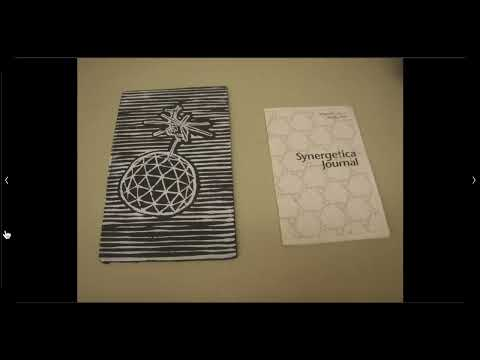

In [18]:
YouTubeVideo("0DoMz5OEwQY")

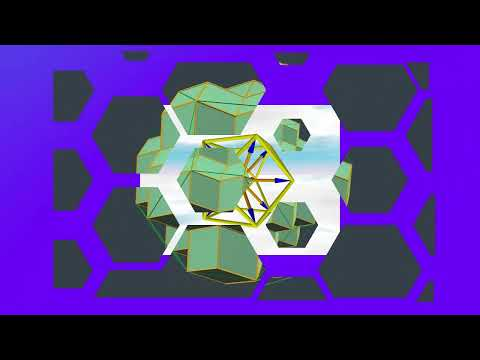

In [19]:
YouTubeVideo("2uogeb6NLQY")